In [40]:
import random as rand
import numpy
def get_dice():
    roll = []
    for i in range(3):
        roll.append(rand.randint(1, 6))
    return roll
def check_3(roll):
    for num in roll:
        if(num == 3):
            return True
    return False


def strategy1(lo, hi,lower,upper):
    sum_a = 0
    for i in range(10):
        roll_a = get_dice()
        if(sum_a < lo):
            while(sum(roll_a) <= upper):
                roll_a = get_dice()
                if(check_3(roll_a)):
                    sum_a = sum_a/2
                    break
            if(check_3(roll_a)):
                sum_a = sum_a
            else:
                sum_a = sum_a + sum(roll_a)
        elif(sum_a > hi):
            while(sum(roll_a) >= lower):
                roll_a = get_dice()
                if(check_3(roll_a)):
                    sum_a = sum_a/2
                    break
            if(check_3(roll_a)):
                sum_a = sum_a
            else:
                sum_a = sum_a + sum(roll_a)
        else:
            sum_a = sum_a + sum(roll_a)
        ##print(sum_a)
    return abs(sum_a-50)
        



In [62]:
import random
# generate dice
def get_dice():
    x = random.randint(1, 6)
    y = random.randint(1, 6)
    z = random.randint(1, 6)
    return [x, y, z]

# strategy 3
def strategy_3(bound):
    score = 0
    for i in range(10):
        dice = get_dice()
        curr_roll = 0
        for idx in range(3):
            curr_roll += dice[idx]
        if score > bound:
            temp1 = score + curr_roll
            temp2 = score - 10
            if abs(temp1 - 50) >= abs(temp2 - 50):
                continue
        score += curr_roll
    return abs(score-50)

def play_game3(para_A, para_B, n):
    win_A = 0
    win_B = 0
    for i in range(n):
        player_A = strategy_3(para_A)
        player_B = strategy_3(para_B)
        if (player_A < player_B):
            win_A+=1
        elif (player_A > player_B):
            win_B+=1
        else:
            win_A += 1
            win_B += 1
    return round(win_A /n,3)


In [77]:


def get_range(lower_a, upper_a,lower_b,upper_b,pick_a,pick_b):
    win_a = 0
    if(pick_a == 1 and pick_b == 1):
        for i in range(5000):
            ans_a = strategy1(10,65,lower_a,upper_a)
            ans_b = strategy1(10,65,lower_b,upper_b)
            if(ans_a <= ans_b):
                win_a = win_a + 1
    if(pick_a == 1 and pick_b == 2):
        for i in range(5000):
            ans_a = strategy1(10,65,lower_a,upper_a)
            ans_b = strategy1(lower_b,upper_b,10,5)
            if(ans_a <= ans_b):
                win_a = win_a + 1
    if(pick_a == 1 and pick_b == 3):
        for i in range(5000):
            ans_a = strategy1(10,65,lower_a,upper_a)
            ans_b = strategy_3(lower_b)
            if(ans_a <= ans_b):
                win_a = win_a + 1
    ##
    if(pick_a == 2 and pick_b == 1):
        for i in range(5000):
            ans_a = strategy1(lower_a,upper_a,10,5)
            ans_b = strategy1(10,65,lower_b,upper_b)
            if(ans_a <= ans_b):
                win_a = win_a + 1
    if(pick_a == 2 and pick_b == 2):
        for i in range(5000):
            ans_a = strategy1(lower_a,upper_a,10,5)
            ans_b = strategy1(lower_b,upper_b,10,5)
            if(ans_a <= ans_b):
                win_a = win_a + 1
    if(pick_a == 2 and pick_b == 3):
        for i in range(5000):
            ans_a = strategy1(lower_a,upper_a,10,5)
            ans_b = strategy_3(lower_b)
            if(ans_a <= ans_b):
                win_a = win_a + 1
    ##
    if(pick_a == 3 and pick_b == 1):
        for i in range(5000):
            ans_a = strategy_3(lower_a)
            ans_b = strategy1(10,65,lower_b,upper_b)
            if(ans_a <= ans_b):
                win_a = win_a + 1
    if(pick_a == 3 and pick_b == 2):
        for i in range(5000):
            ans_a = strategy_3(lower_a)
            ans_b = strategy1(lower_b,upper_b,10,5)
            if(ans_a <= ans_b):
                win_a = win_a + 1
    if(pick_a == 3 and pick_b == 3):
        for i in range(5000):
            ans_a = strategy_3(lower_a)
            ans_b = strategy_3(lower_b)
            if(ans_a <= ans_b):
                win_a = win_a + 1
    
    return round(win_a / 5000,3)





    


In [70]:


def table_data(input_a,input_b):
    ans = [[0 for _ in range(len(input_a))] for _ in range(len(input_a))]
    for j in range(len(input_a)):
        lower_a = input_a[j][0]
        upper_a = input_a[j][1]
        pick_a = input_a[j][2]
        for k in range(len(input_b)):
            lower_b = input_b[k][0]
            upper_b = input_b[k][1]
            pick_b = input_b[k][2]
            range_a = [0]*10
            for i in range(10):
                range_a[i] = get_range(lower_a, upper_a,lower_b,upper_b,pick_a,pick_b)
            range_a.sort()
            ans[j][k] = (range_a[0],range_a[len(range_a)-1])
    return ans

In [82]:

input_a = [[10,15,1],[15,5,1],[10,10,1],[10,65,2],[15,70,2],[15,65,2]]
input_b = [[10,15,1],[15,5,1],[10,10,1],[10,65,2],[15,70,2],[15,65,2]]

input_Ba = [[35,3,3],[40,3,3],[45,3,3],[50,3,3],[55,3,3],[60,3,3]]
input_Bb = [[35,3,3],[40,3,3],[45,3,3],[50,3,3],[55,3,3],[60,3,3]]
##input_Bb = [[35,3,3],[40,3,3],[45,3,3],[50,3,3],[55,3,3]]

input_ca = [[10,10,1],[10,65,2],[45,3,3]]
input_cb = [[10,10,1],[10,65,2],[45,3,3]]
ans_B = table_data(input_Ba,input_Bb)
for i in range(len(input_Ba)):
    print(ans_B[i])

[(0.538, 0.558), (0.541, 0.557), (0.536, 0.561), (0.583, 0.596), (0.887, 0.904), (0.997, 0.999)]
[(0.536, 0.568), (0.549, 0.564), (0.543, 0.559), (0.577, 0.604), (0.887, 0.903), (0.998, 0.999)]
[(0.549, 0.561), (0.543, 0.554), (0.544, 0.564), (0.58, 0.595), (0.891, 0.903), (0.998, 1.0)]
[(0.499, 0.513), (0.503, 0.512), (0.494, 0.511), (0.532, 0.558), (0.837, 0.854), (0.978, 0.984)]
[(0.152, 0.169), (0.152, 0.166), (0.154, 0.167), (0.205, 0.222), (0.53, 0.545), (0.846, 0.863)]
[(0.003, 0.006), (0.003, 0.006), (0.004, 0.007), (0.031, 0.037), (0.186, 0.208), (0.537, 0.548)]


[(0.539, 0.5554), (0.534, 0.5564), (0.5384, 0.5608), (0.5742, 0.6), (0.8848, 0.9052), 0]
[(0.5432, 0.5752), (0.5344, 0.5556), (0.5432, 0.5556), (0.5728, 0.5942), (0.888, 0.899), 0]
[(0.5434, 0.5578), (0.5394, 0.5626), (0.5412, 0.5638), (0.578, 0.5946), (0.8866, 0.9046), 0]
[(0.491, 0.5088), (0.4856, 0.5116), (0.492, 0.5094), (0.5282, 0.5522), (0.8364, 0.8468), 0]
[(0.1496, 0.1676), (0.1476, 0.1678), (0.152, 0.1672), (0.2036, 0.2162), (0.5296, 0.557), 0]


In [4]:
for i in range(7):
    print(ans[i])
#5 10
#10 5

[(0.505, 0.535), (0.675, 0.728), (0.601, 0.649), (0.599, 0.629), (0.725, 0.752), (0.886, 0.916), (0.895, 0.932)]
[(0.317, 0.364), (0.509, 0.547), (0.42, 0.482), (0.405, 0.456), (0.542, 0.604), (0.696, 0.734), (0.71, 0.737)]
[(0.362, 0.418), (0.562, 0.605), (0.484, 0.526), (0.48, 0.52), (0.604, 0.675), (0.767, 0.815), (0.793, 0.821)]
[(0.371, 0.423), (0.559, 0.611), (0.48, 0.542), (0.481, 0.526), (0.622, 0.647), (0.778, 0.812), (0.796, 0.835)]
[(0.262, 0.294), (0.468, 0.498), (0.365, 0.412), (0.36, 0.403), (0.515, 0.551), (0.649, 0.675), (0.649, 0.7)]
[(0.093, 0.113), (0.283, 0.314), (0.203, 0.236), (0.2, 0.236), (0.325, 0.38), (0.48, 0.55), (0.519, 0.544)]
[(0.083, 0.106), (0.247, 0.313), (0.187, 0.227), (0.181, 0.222), (0.299, 0.352), (0.45, 0.493), (0.488, 0.537)]


In [9]:


def get_range_2(lower_a, upper_a,lower_b,upper_b):
    win_a = 0
    for i in range(1000):
        ans_a = strategy1(lower_a,upper_a,10,10)
        ans_b = strategy1(lower_b,upper_b,10,10)
        if(ans_a <= ans_b):
            win_a = win_a + 1
    return win_a / 1000


input_a_2 = [[10,65],[10,70],[10,75]]
input_b_2 = [[10,65],[10,70],[10,75]]

ans_2 = [[0,0,0,0,0,0,0] for i in range(7)]
for j in range(len(input_a_2)):
    lower_a_2 = input_a_2[j][0]
    upper_a_2 = input_a_2[j][1]
    for k in range(len(input_b_2)):
        lower_b_2 = input_b_2[k][0]
        upper_b_2 = input_b_2[k][1]
        range_a_2 = [0]*10
        for i in range(10):
            range_a_2[i] = get_range_2(lower_a_2, upper_a_2,lower_b_2,upper_b_2)
        range_a_2.sort()
        ans_2[j][k] = (range_a_2[0],range_a_2[len(range_a_2)-1])
print(ans_2)

[[(0.488, 0.534), (0.525, 0.557), (0.455, 0.504), (0.491, 0.529), (0.517, 0.566), (0.484, 0.53), (0.511, 0.541)], [(0.448, 0.497), (0.476, 0.523), (0.422, 0.461), (0.459, 0.502), (0.474, 0.528), (0.452, 0.499), (0.462, 0.517)], [(0.5, 0.566), (0.545, 0.588), (0.483, 0.536), (0.501, 0.561), (0.549, 0.591), (0.517, 0.553), (0.538, 0.577)], [(0.487, 0.518), (0.518, 0.59), (0.46, 0.502), (0.468, 0.53), (0.521, 0.577), (0.476, 0.549), (0.507, 0.543)], [(0.454, 0.508), (0.484, 0.542), (0.443, 0.456), (0.442, 0.506), (0.474, 0.556), (0.447, 0.503), (0.463, 0.51)], [(0.483, 0.528), (0.521, 0.589), (0.471, 0.502), (0.504, 0.533), (0.532, 0.562), (0.477, 0.539), (0.506, 0.562)], [(0.463, 0.505), (0.497, 0.543), (0.438, 0.487), (0.463, 0.497), (0.496, 0.565), (0.462, 0.504), (0.482, 0.528)]]


In [10]:
for i in range(7):
    print(ans_2[i])
## 5 70 5 75
## 10 70 15 70

[(0.488, 0.534), (0.525, 0.557), (0.455, 0.504), (0.491, 0.529), (0.517, 0.566), (0.484, 0.53), (0.511, 0.541)]
[(0.448, 0.497), (0.476, 0.523), (0.422, 0.461), (0.459, 0.502), (0.474, 0.528), (0.452, 0.499), (0.462, 0.517)]
[(0.5, 0.566), (0.545, 0.588), (0.483, 0.536), (0.501, 0.561), (0.549, 0.591), (0.517, 0.553), (0.538, 0.577)]
[(0.487, 0.518), (0.518, 0.59), (0.46, 0.502), (0.468, 0.53), (0.521, 0.577), (0.476, 0.549), (0.507, 0.543)]
[(0.454, 0.508), (0.484, 0.542), (0.443, 0.456), (0.442, 0.506), (0.474, 0.556), (0.447, 0.503), (0.463, 0.51)]
[(0.483, 0.528), (0.521, 0.589), (0.471, 0.502), (0.504, 0.533), (0.532, 0.562), (0.477, 0.539), (0.506, 0.562)]
[(0.463, 0.505), (0.497, 0.543), (0.438, 0.487), (0.463, 0.497), (0.496, 0.565), (0.462, 0.504), (0.482, 0.528)]


In [20]:
import matplotlib.pyplot as plt
def get_line(run,lower_a, upper_a,lower_b,upper_b):
    win_a = 0
    for i in range(run):
        ans_a = strategy1(10,70,lower_a,upper_a)
        ans_b = strategy1(10,70,lower_b,upper_b)
        if(ans_a <= ans_b):
            win_a = win_a + 1
    return win_a / run

ans_5_10 = [[0 for j in range(50)] for i in range(10)]



for i in range(10):
    idx = 0
    x_line = []*50
    for j in range(100,5100,100):
        x_line.append(j)
        ans_5_10[i][idx] = get_line(j,5,10,10,5)
        idx = idx +1




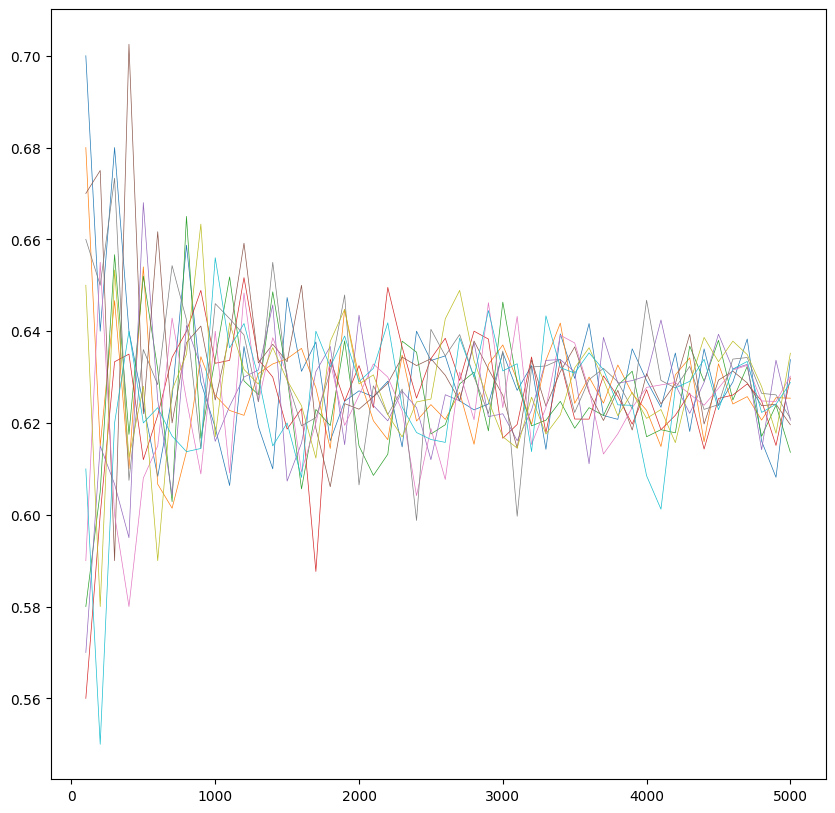

In [21]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.plot(x_line,ans_5_10[i],linewidth='0.5')